In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../data_sets/titanic_train.csv')

In [4]:
df.groupby('Pclass').aggregate(['mean', 'count'])

PassengerId        Survived              Age           SibSp        \
              mean count      mean count       mean count      mean count   
Pclass                                                                      
1       461.597222   216  0.629630   216  38.233441   186  0.416667   216   
2       445.956522   184  0.472826   184  29.877630   173  0.402174   184   
3       439.154786   491  0.242363   491  25.140620   355  0.615071   491   

           Parch             Fare        
            mean count       mean count  
Pclass                                   
1       0.356481   216  84.154687   216  
2       0.380435   184  20.662183   184  
3       0.393075   491  13.675550   491

In [10]:
df.sort_values('Age', ascending=False, ignore_index=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
1,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
2,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
3,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
4,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
886,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
887,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
888,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
889,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


## Map
---

In [12]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [13]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [15]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


## Apply
- Aplicar uma função ao df ou Serie
----

In [16]:
df1 = pd.DataFrame(np.random.randint(1, 10, (3, 3)), columns = 'A B C'.split())

In [18]:
df1

,A,B,C
0,6,8,8
1,8,1,3
2,8,1,4


In [20]:
df1['C'].apply(np.sqrt)

0    2.828427
1    1.732051
2    2.000000
Name: C, dtype: float64

In [22]:
df1['C'].apply(np.sin)

0    0.989358
1    0.141120
2   -0.756802
Name: C, dtype: float64

In [31]:
def imprime_valor(valor):
    print(valor)

def dobrar_valor(valor):
    return valor * 2

df1['C'].apply(dobrar_valor)

0    16
1     6
2     8
Name: C, dtype: int64

In [37]:
df1['C'].apply(lambda v: 'Par' if v % 2 == 0 else 'Impar')

0      Par
1    Impar
2      Par
Name: C, dtype: object

### Aplicando para o df inteiro

In [41]:
df1

,A,B,C
0,6,8,8
1,8,1,3
2,8,1,4


In [54]:
def imprimir(valor):
    return valor['A']

df1.apply(imprimir, axis=1)

0    6
1    8
2    8
dtype: int64

### Voltando ao titanic

In [57]:
df['Fare'] = df['Fare'].apply(lambda v: f'${round(v, 2)}')

In [59]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,$7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,$71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,$7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,$53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,$8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,$13.0,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,$30.0,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,$23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,$30.0,C148,C


### get_dummies

In [62]:
df_temp = df.drop(['Name', 'Fare', 'Ticket', 'Cabin'], axis=1)

In [64]:
df_temp

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,0,22.0,1,0,S
1,2,1,1,1,38.0,1,0,C
2,3,1,3,1,26.0,0,0,S
3,4,1,1,1,35.0,1,0,S
4,5,0,3,0,35.0,0,0,S
...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,S
887,888,1,1,1,19.0,0,0,S
888,889,0,3,1,NaN,1,2,S
889,890,1,1,0,26.0,0,0,C


In [69]:
df_temp['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [72]:
df_temp['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [73]:
df_temp['Embarked'] = df_temp['Embarked'].fillna('S')

In [77]:
pd.get_dummies(df_temp, drop_first=True)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,0,1
1,2,1,1,1,38.0,1,0,0,0
2,3,1,3,1,26.0,0,0,0,1
3,4,1,1,1,35.0,1,0,0,1
4,5,0,3,0,35.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,0,1
887,888,1,1,1,19.0,0,0,0,1
888,889,0,3,1,NaN,1,2,0,1
889,890,1,1,0,26.0,0,0,0,0


### União de dataframes

#### Concat

In [80]:
dados = np.arange(1, 10).reshape((3,3))

In [97]:
df1 = pd.DataFrame(dados, columns='A B C'.split())
df2 = pd.DataFrame(dados, columns='A B C'.split())
df3 = pd.DataFrame(dados, columns='D E F'.split())

In [88]:
pd.concat([df1, df3], axis=1)

,A,B,C,D,E,F
0,1,2,3,1,2,3
1,4,5,6,4,5,6
2,7,8,9,7,8,9


In [90]:
pd.concat([df1, df2])

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9
0,1,2,3
1,4,5,6
2,7,8,9


In [92]:
pd.concat([df1, df2], ignore_index=True)

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9
3,1,2,3
4,4,5,6
5,7,8,9


### Merge
-Intersecção e união de dois dataframes

In [98]:
df1 = pd.DataFrame(dados, columns='A B C'.split())
df2 = pd.DataFrame(dados, columns='A B C'.split())
df3 = pd.DataFrame(dados, columns='D B C'.split())

In [99]:
pd.merge(df1, df3)

,A,B,C,D
0,1,2,3,1
1,4,5,6,4
2,7,8,9,7


### Join

In [106]:
df1 = pd.DataFrame(dados, columns='A B C'.split(), index=[0, 1, 2])
df2 = pd.DataFrame(dados, columns='D E F'.split(), index=[1, 2, 3])
df3 = pd.DataFrame(dados, columns='D E F'.split(), index=[0, 1, 2])

In [114]:
df1.join(df2, how='right')

,A,B,C,D,E,F
1,4.0,5.0,6.0,1,2,3
2,7.0,8.0,9.0,4,5,6
3,NaN,NaN,NaN,7,8,9


In [110]:
df1.join(df3)

,A,B,C,D,E,F
0,1,2,3,1,2,3
1,4,5,6,4,5,6
2,7,8,9,7,8,9


In [116]:
df2.join(df1, how='outer')

,D,E,F,A,B,C
0,NaN,NaN,NaN,1.0,2.0,3.0
1,1.0,2.0,3.0,4.0,5.0,6.0
2,4.0,5.0,6.0,7.0,8.0,9.0
3,7.0,8.0,9.0,NaN,NaN,NaN


In [118]:
df2.reset_index(drop = True, inplace=True)

In [120]:
df2

,D,E,F
0,1,2,3
1,4,5,6
2,7,8,9


In [133]:
dados2 = np.arange(1, 13).reshape((3, 4))

## Matplotlib: Gráficos no python

In [146]:
import matplotlib.pyplot as plt
%matplotlib inline

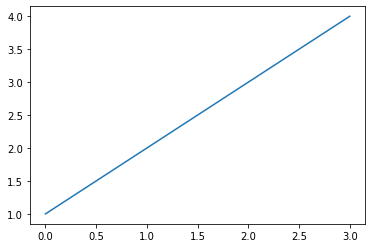

In [149]:
plt.plot([1, 2, 3, 4]) #neste caso o eixo x é igual ao index da lista

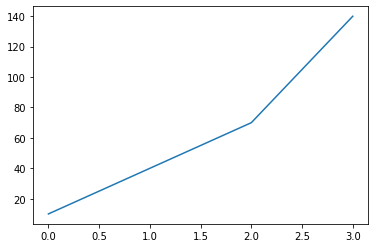

In [150]:
plt.plot([0,1,2,3], [10, 40, 70, 140])

In [162]:
x = np.arange(0, 10, 0.01)
y1 = np.sin(x)
y2 = np.cos(x)

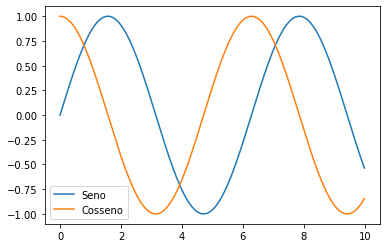

In [165]:
plt.plot(x, y1, label='Seno')
plt.plot(x, y2, label='Cosseno')
plt.legend()